<a href="https://colab.research.google.com/github/sharadnatarajSJSU/Eluvio/blob/main/Eluvio_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_folder='/content/drive/MyDrive/Eluvio/Eluvio Challange/Train'
test_folder = '/content/drive/MyDrive/Eluvio/Eluvio Challange/Test'

In [ ]:
classes = ['Acura',
 'Audi',
 'BMW',
 'Chevrolet',
 'Ford',
 'Honda',
 'Hyundai',
 'Infiniti',
 'KIA',
 'Lamborghini',
 'Lexus',
 'Mazda',
 'MercedesBenz',
 'Nissan',
 'Porsche',
 'Tesla',
 'Toyota',
 'Volkswagen']

In [ ]:
class_dict = {'Acura': 0,
 'Audi': 1,
 'BMW': 2,
 'Chevrolet': 3,
 'Ford': 4,
 'Honda': 5,
 'Hyundai': 6,
 'Infiniti': 7,
 'KIA': 8,
 'Lamborghini': 9,
 'Lexus': 10,
 'Mazda': 11,
 'MercedesBenz': 12,
 'Nissan': 13,
 'Porsche': 14,
 'Tesla': 15,
 'Toyota': 16,
 'Volkswagen': 17}

# Load Data

In [ ]:
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for  cate in cates: 
    for img_name in os.listdir(data_path + '/'+ cate + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + '/' + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(class_dict[cate])
  return X, y

In [ ]:
X_train, y_train = load_images_and_labels(train_folder, classes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
X_test, y_test = load_images_and_labels(test_folder, classes)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105


In [ ]:
keylist = list(class_dict.keys())

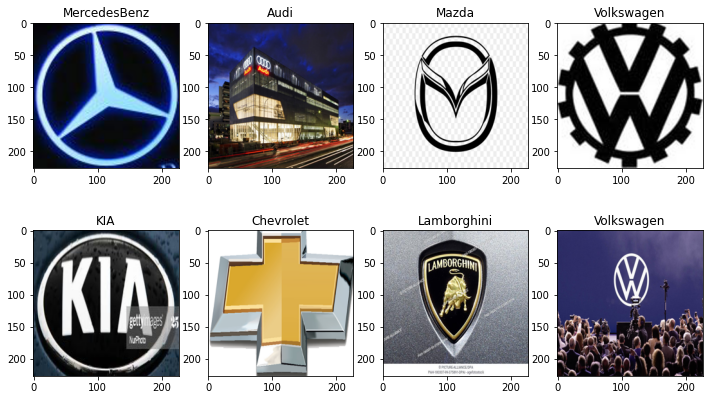

In [ ]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(keylist[y_train[ind]])

# PreProcessing

In [ ]:
from tensorflow.keras.utils import to_categorical

def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  y = np.array(y)

  y = to_categorical(y)
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  return X, y

In [ ]:
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen =ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Building Resnet

In [ ]:
import keras
import tensorflow as tf


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import gradient_descent_v2,adam_v2
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D,BatchNormalization,MaxPooling2D,Flatten

In [ ]:
from tensorflow.keras.applications import ResNet50



In [ ]:
resnet_base_model = ResNet50(input_shape=(227,227,3), include_top=False,weights=None, pooling='max' )

In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnet_model = Sequential([
        resnet_base_model,
        Flatten(),
        Dense(1024, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(1024, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(18,activation="softmax")
    ])

opt = gradient_descent_v2.SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
resnet_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=METRICS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_20 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_14 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 1024)              1049600   
                                                      

In [ ]:
it_train = datagen.flow(X_train, y_train, batch_size = 64)

In [ ]:
it_val = datagen.flow(X_val, y_val, batch_size = 32)

In [ ]:
r = resnet_model.fit(it_train,
          epochs=100,
          validation_data=it_val,
          steps_per_epoch=12,
          validation_steps=5,verbose = 1)

Epoch 1/100
12/12 [==============================] - 21s 1s/step - loss: 3.6935 - accuracy: 0.0667 - precision: 0.0469 - recall: 0.0039 - val_loss: 996633346048.0000 - val_accuracy: 0.0296 - val_precision: 0.0296 - val_recall: 0.0296
Epoch 2/100
12/12 [==============================] - 14s 1s/step - loss: 3.5656 - accuracy: 0.0641 - precision: 0.0566 - recall: 0.0039 - val_loss: 319435472896.0000 - val_accuracy: 0.0444 - val_precision: 0.0444 - val_recall: 0.0444
Epoch 3/100
12/12 [==============================] - 13s 1s/step - loss: 3.2848 - accuracy: 0.0654 - precision: 0.0303 - recall: 0.0013 - val_loss: 12874161152.0000 - val_accuracy: 0.0889 - val_precision: 0.0889 - val_recall: 0.0889
Epoch 4/100
12/12 [==============================] - 13s 1s/step - loss: 3.1948 - accuracy: 0.0601 - precision: 0.0435 - recall: 0.0013 - val_loss: 335427936.0000 - val_accuracy: 0.0444 - val_precision: 0.0444 - val_recall: 0.0444
Epoch 5/100
12/12 [==============================] - 14s 1s/step - l

Text(0.5, 1.0, 'Accuracy Evolution')

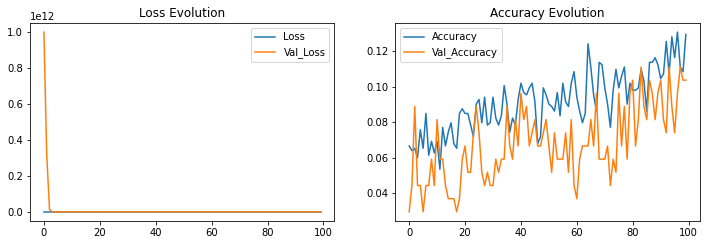

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
it_test = datagen.flow(X_test, y_test, batch_size = 32)

In [ ]:
evaluation =resnet_model.evaluate(it_test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(it_train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

4/4 [==============================] - 1s 268ms/step - loss: 2.9769 - accuracy: 0.0571 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy: 5.71%
12/12 [==============================] - 9s 709ms/step - loss: 2.7552 - accuracy: 0.1059 - precision: 0.0000e+00 - recall: 0.0000e+00
Train Accuracy: 10.59%
